# Primerjava podatkov o igri League of legends

Projekt pri predmetu Programiranje 1 namenjen primerjavi razlicnih karaterjev v priljubljeni racunalniski igri League of legends

Patch 6.3

Spodaj bomo namesto besede League of legends uporabljali okrajšavo lol

In [2]:
import pandas as pd
%matplotlib inline

podatki = pd.read_csv('podatki.csv', index_col='title')
pd.options.display.max_rows = 20

Igra lol je priljubljena računalniška igra kjer se spopadeta dve ekipi (vsaka s po petimi igralci). Vsak izmed igralcev si izbere svojega heroja (champion), in vsak heroj ima svoje posebne zmoznosti.V vsaki ekipi si praviloma igralci razdelijo 5 razlicnih nalog (role-ov) (top-lane, mid-lane, adc, support, in pa jungle). Njuin cilj pa je nasprotni ekipi uničiti nasprotnikovo središče (Nexus). Ekipam to prepecujejo minioni in pa stolpi. Ko igralci uničijo ene ali druge,ali pa ubijejo nasprotnike, za to dobijo zlato, ki ga lahko zamenjajo v bazi za predmete, ki jih naredijo močnejše.

In [3]:
podatki.head(10)

,deaths,experience,winPercent,playPercent,overallPosition,totalDamageDealtToChampions,kills,minionsKilled,neutralMinionsKilledTeamJungle,totalDamageTaken,largestKillingSpree,totalHeal,banRate,role,neutralMinionsKilledEnemyJungle,assists,key,overallPositionChange,goldEarned
title,,,,,,,,,,,,,,,,,,,
Yorick,5.99,35.78,46.70,0.48,55,21457,4.46,169.6,3.71,29846,2.02,12963,0,Top,1.84,7.13,Yorick,-1,11635
Mordekaiser,6.58,80.79,47.08,0.34,54,20967,5.21,186.7,5.97,18596,2.46,9183,0,Top,3.27,5.48,Mordekaiser,2,12055
Urgot,6.08,49.44,48.56,0.23,50,21419,5.85,178.1,3.86,19368,2.76,1633,0,Top,1.48,6.20,Urgot,5,11944
Nunu,5.89,8.46,41.72,0.14,57,16460,3.83,163.6,4.36,31044,1.80,9159,0,Top,2.42,7.63,Nunu,0,11235
Aatrox,5.53,63.04,47.71,0.68,38,18349,5.08,190.6,7.49,31118,2.57,14667,0,Top,4.59,5.86,Aatrox,1,12309
Cassiopeia,6.53,80.44,46.25,0.17,47,22662,5.91,189.8,6.77,21174,2.68,4590,0,Top,2.15,5.81,Cassiopeia,4,12366
Galio,5.08,34.04,51.56,0.25,21,20626,4.26,205.9,2.96,27287,2.19,7543,0,Top,1.19,9.61,Galio,11,12289
Karthus,7.22,51.93,46.75,0.12,32,28945,6.40,209.7,9.10,22687,2.44,2074,0,Top,2.00,8.28,Karthus,4,13266
Heimerdinger,5.76,137.66,49.68,0.79,27,24448,3.83,206.5,2.80,19480,1.73,1209,0,Top,1.39,6.06,Heimerdinger,19,12235


In [4]:
podatki['winPercent']

title
Yorick          46.70
Mordekaiser     47.08
Urgot           48.56
Nunu            41.72
Aatrox          47.71
Cassiopeia      46.25
Galio           51.56
Karthus         46.75
Heimerdinger    49.68
Jayce           46.21
                ...  
Leona           50.48
Morgana         49.62
Thresh          48.22
Poppy           48.05
Lulu            46.50
Blitzcrank      52.64
Braum           50.65
Janna           54.46
Alistar         49.35
Nautilus        51.97
Name: winPercent, dtype: float64

In [5]:
podatki.sort_values(['winPercent'],ascending=[False])[['winPercent','role']]

,winPercent,role
title,,
Nautilus,55.35,Top
Shyvana,55.11,Jungle
Rammus,54.57,Top
Janna,54.46,Support
Udyr,54.42,Jungle
Graves,54.03,ADC
Kayle,54.01,Top
Pantheon,53.99,Top
Volibear,53.72,Jungle


Po mojem mnenju je ena bolj zanimivih nalog jungle. Vsebuje namrec vec razlicnih načinov igranja in premore vec različnih načinov pridobivanja zlata.

In [6]:
podatki.groupby('role').size()

role
ADC        18
Jungle     48
Middle     48
Support    25
Top        57
dtype: int64

In [7]:
jungle = podatki[podatki.role == 'Jungle']
jungle

,deaths,experience,winPercent,playPercent,overallPosition,totalDamageDealtToChampions,kills,minionsKilled,neutralMinionsKilledTeamJungle,totalDamageTaken,largestKillingSpree,totalHeal,banRate,role,neutralMinionsKilledEnemyJungle,assists,key,overallPositionChange,goldEarned
title,,,,,,,,,,,,,,,,,,,
Aatrox,5.22,51.96,51.26,0.35,15,16154,5.93,55.2,69.83,35145,3.06,22927,0,Jungle,12.03,7.09,Aatrox,18,12342
Skarner,4.50,55.79,53.25,1.29,16,12293,4.61,40.9,66.18,28455,2.48,7137,0,Jungle,11.05,10.23,Skarner,12,11718
Hecarim,5.56,41.31,44.36,1.20,38,15753,6.21,49.4,66.27,36118,3.10,11774,0,Jungle,8.50,8.86,Hecarim,-1,12056
Nunu,4.58,35.33,50.62,0.83,33,12586,3.88,45.8,57.87,36711,2.08,13343,0,Jungle,12.55,10.93,Nunu,3,11445
Sejuani,4.63,34.86,49.66,2.25,31,14641,4.51,47.1,64.39,35518,2.38,7374,0,Jungle,7.69,11.05,Sejuani,-8,11595
Sion,5.40,66.33,48.94,0.28,30,17259,4.84,69.6,54.07,37644,2.26,19460,0,Jungle,6.36,10.83,Sion,12,11871
Warwick,5.39,47.32,51.00,2.10,14,14488,6.12,37.6,67.25,37891,2.99,19706,0,Jungle,9.52,8.44,Warwick,4,11987
Maokai,5.59,45.72,47.29,0.56,42,15408,4.43,48.8,56.24,37336,2.16,11873,0,Jungle,6.87,11.55,Maokai,1,11313
Fiddlesticks,5.59,138.99,50.13,1.72,22,17256,5.50,43.9,68.33,29425,2.78,16879,0,Jungle,7.42,9.27,FiddleSticks,-5,11832


In [8]:
jungle.sort_values(['winPercent'],ascending=[False])[['winPercent','playPercent']]

,winPercent,playPercent
title,,
Shyvana,55.11,10.05
Udyr,54.42,8.59
Volibear,53.72,5.29
Skarner,53.25,1.29
Master Yi,53.22,12.86
Amumu,53.09,7.72
Jax,51.75,3.71
Xin Zhao,51.46,7.72
Trundle,51.46,1.00


Spodnji graf prikazuje razporeditev najbolj igranih herojev. Ce je procent igranja heroja mansi od 1 procenta potem ga ignoriramo (ponavadi gre namrec za t.i. "torle", ki bol ali manj le unicujejo statistiko :D)

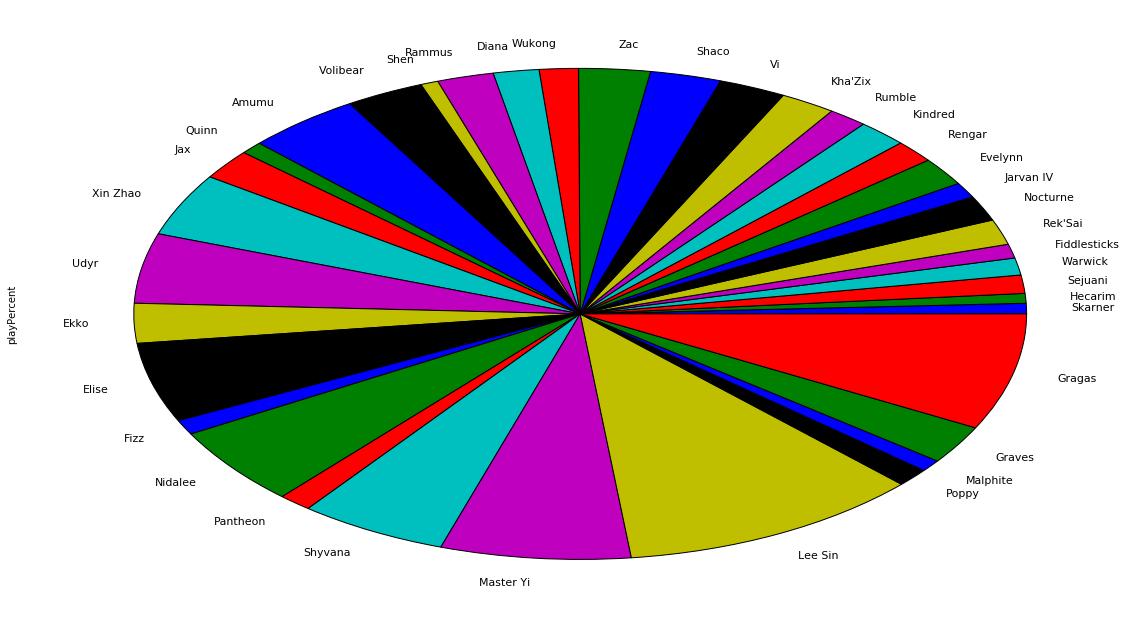

In [9]:
jungle[(jungle.playPercent > 1)]['playPercent'].plot(kind='pie',fontsize=11,figsize=(20,11))

In [10]:
lee = jungle.loc['Lee Sin']
lee

deaths                               5.77
experience                          71.78
winPercent                          45.96
playPercent                         20.48
overallPosition                        29
totalDamageDealtToChampions         14760
kills                                6.35
minionsKilled                        39.8
neutralMinionsKilledTeamJungle      59.17
totalDamageTaken                    30061
largestKillingSpree                  3.05
totalHeal                            6478
banRate                                 0
role                               Jungle
neutralMinionsKilledEnemyJungle      9.83
assists                              8.97
key                                LeeSin
overallPositionChange                   5
goldEarned                          11676
Name: Lee Sin, dtype: object

Naslednji graf nam prikazuje razmerje med popularnostjo championa in njegovo procentjo uspesnosti v igrah

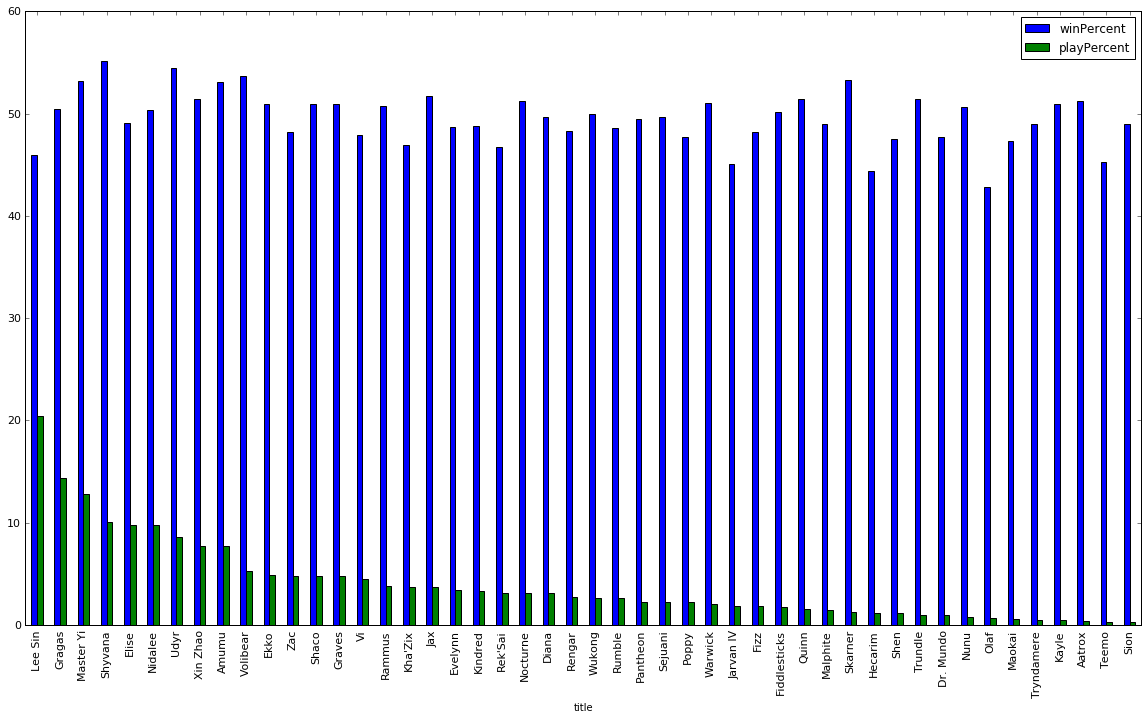

In [11]:
jungle.sort_values(['playPercent'],ascending=[False])[['winPercent','playPercent']].plot(kind='bar',fontsize=11,figsize=(20,11))
#jungle.groupby('playPercent','winPercent').size().plot(kind='bar', fontsize=11,figsize=(20,11))

Opazimo lahko da med popularnostjo in uspešnostjo v nasprotju z pricakovanji ni ravno razvidna. Bolj popularni junaki niso nujno bolj uspesni. To bi pripisal predvesm temu da so nekateri junaki tezji za igrati, in pa da jim popularnos povecujejo nekateri zani igralci ki igrajo popularne junake na visokem nivoju (Na primer Gripex je precej znan Lee Sin main, ki je zelo visoko na lestvici uspesnosti)

Zanimiva bi bila tudi primerjava med popularnostjo in skodo ki jo junak povzroci nasprotni ekipi (playPercent in totalDamageDealtToChampions) in pa podoben graf primerjave med uspesnostjo in povzroceno skodo. 

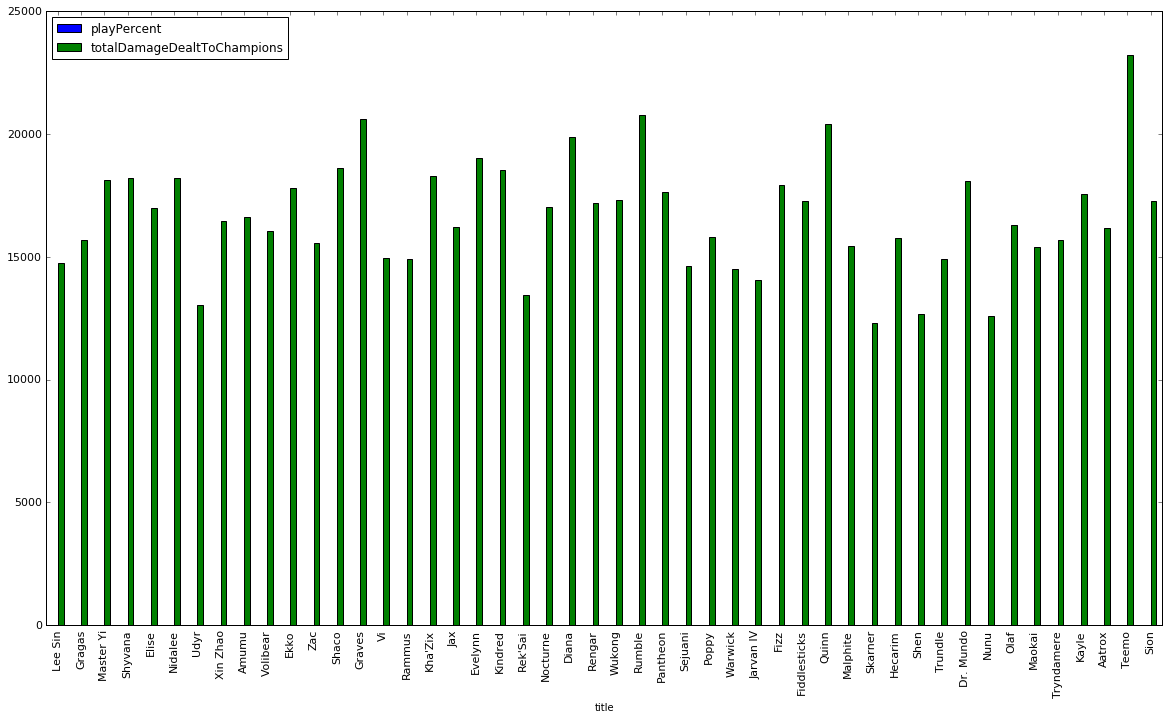

In [13]:
jungle.sort_values(['playPercent'],ascending=[False])[['playPercent','totalDamageDealtToChampions']].plot(kind='bar',fontsize=11,figsize=(20,11))

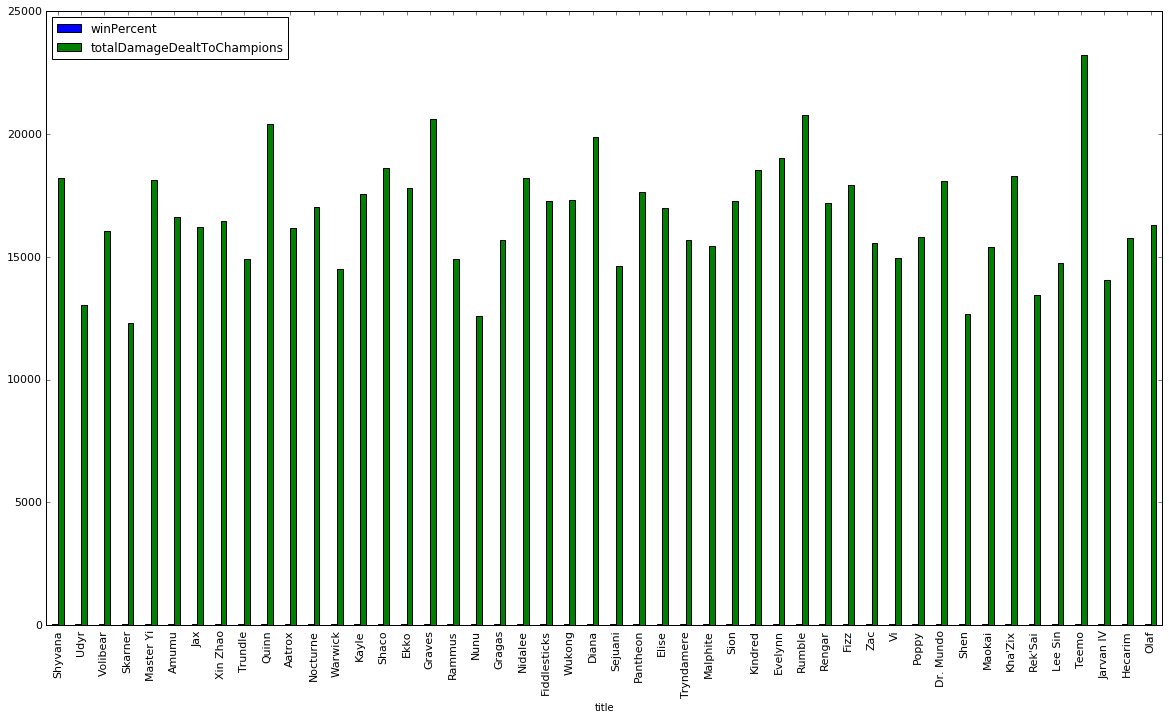

In [14]:
jungle.sort_values(['winPercent'],ascending=[False])[['winPercent','totalDamageDealtToChampions']].plot(kind='bar',fontsize=11,figsize=(20,11))